# 0 Loading packages <a name="loading"></a> 

In [1]:
import sys
print(sys.executable)
print(sys.path)
print(sys.version)

/home2/s418610/.conda/envs/py37_res_PAGA/bin/python
['/home2/s418610/jupyter_notebooks/03.Invivo_neuronal_reprogramming/Manuscript/to_GitHub', '', '/cm/shared/apps/cnvkit/0.9.5/lib/python3.6/site-packages', '/cm/shared/apps/python/3.6.4-anaconda/lib', '/cm/shared/apps/jupyterkernel-matlab/0.16.1/lib/python3.6/site-packages', '/cm/shared/apps/python/2.7.x-anaconda/lib', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python37.zip', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/lib-dynload', '/home2/s418610/.local/lib/python3.7/site-packages', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/fa2-0.3.5-py3.7-linux-x86_64.egg', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/IPython/extensions', '/home2/s418610/.ipython']
3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


In [2]:
import re
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.sparse
import sklearn.manifold
import statsmodels.api as sm

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pyclustering.cluster.kmedoids import kmedoids

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sb

import scanpy as sc
import harmonypy as hm
import anndata

In [3]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
# plt.rcParams["axes.grid"] = False
sc.settings.verbosity = 3

# sc.set_figure_params(figsize=(8,8), fontsize=12)

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)
print('sklearn', sklearn.__version__)
print('statsmodels', sm.__version__)
print('matplotlib', mpl.__version__)
print('seaborn', sns.__version__)

sc.logging.print_versions() # scanpy==1.4.5.post1, anndata==0.6.22.post1

!date +%F

numpy 1.17.2
pandas 0.25.2
scipy 1.3.1
sklearn 0.21.3
statsmodels 0.10.1
matplotlib 3.3.2
seaborn 0.9.0
scanpy==1.4.5.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1
2021-07-29


In [4]:
import os

# set a working directory for saving plots
wdir = "/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/99.Manuscript/Figures_revision/"
os.chdir( wdir )

In [5]:
# A sub-directory for saving intermediate data for organized pipeline v1
data_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/data/10x_remapped/Revision/'

In [6]:
neural_data_dir = data_dir + 'NeuralOnly/'

# 1 Load data

In [8]:
df_X = pd.read_csv('/project/GCRB/Hon_lab/s418610/Data/scRNA-seq/Hochgerner_2018/GSE104323_datasetC_P23_P120/GSE104323_10X_expression_data_V2.tab.gz', sep='\t', index_col=0)

In [10]:
df_X = df_X.T

In [11]:
df_X

cellid                   0610007P14Rik  0610009B22Rik  0610009L18Rik  \
10X79_1_TCTACCATGCCTAA-              0              0              0   
10X79_2_GTACTAGTGAACAT-              0              0              0   
10X79_2_AATCAGTACCTACA-              1              1              0   
10X79_1_CGGGTTCTTGAGGT-              0              0              0   
10X79_1_GTGGAAGGCGTACA-              0              0              0   
...                                ...            ...            ...   
10X80_1_CACGGTCTACGAGT-              0              0              0   
10X80_2_ATTGCAGCCACGTC-              0              0              0   
10X80_1_GCGGTTCGGCATCG-              0              0              0   
10X83_4_TTCAGCATACTCTT-              0              0              0   
10X80_1_TTACCAGGAGTAGA-              0              0              0   

cellid                   0610009O20Rik  0610010F05Rik  0610010K14Rik  \
10X79_1_TCTACCATGCCTAA-              0              0              0   
10X79_2_GTACTAGTGAACAT-              0              0              0   
10X79_2_AATCAGTACCTACA-              0              0              0   
10X79_1_CGGGTTCTTGAGGT-              0              0              0   
10X79_1_GTGGAAGGCGTACA-              0              0              0   
...                                ...            ...            ...   
10X80_1_CACGGTCTACGAGT-              1              0              0   
10X80_2_ATTGCAGCCACGTC-              0              0              0   
10X80_1_GCGGTTCGGCATCG-              0              0              1   
10X83_4_TTCAGCATACTCTT-              0              0              0   
10X80_1_TTACCAGGAGTAGA-              0              0              0   

cellid                   0610011F06Rik  0610012D04Rik  0610012G03Rik  \
10X79_1_TCTACCATGCCTAA-              0              0              0   
10X79_2_GTACTAGTGAACAT-              0              0              0   
10X79_2_AATCAGTACCTACA-              0              0              0   
10X79_1_CGGGTTCTTGAGGT-              2              0              1   
10X79_1_GTGGAAGGCGTACA-              0              0              0   
...                                ...            ...            ...   
10X80_1_CACGGTCTACGAGT-              0              0              1   
10X80_2_ATTGCAGCCACGTC-              0              0              2   
10X80_1_GCGGTTCGGCATCG-              0              0              0   
10X83_4_TTCAGCATACTCTT-              0              0              0   
10X80_1_TTACCAGGAGTAGA-              0              0              0   

cellid                   0610025J13Rik  ...  mt-Co2  mt-Co3  mt-Cytb  mt-Nd1  \
10X79_1_TCTACCATGCCTAA-              0  ...       6      33       10      11   
10X79_2_GTACTAGTGAACAT-              0  ...      27      37       22      14   
10X79_2_AATCAGTACCTACA-              0  ...      23      35       26      32   
10X79_1_CGGGTTCTTGAGGT-              0  ...       5      20        9       7   
10X79_1_GTGGAAGGCGTACA-              0  ...       0      21        6      12   
...                                ...  ...     ...     ...      ...     ...   
10X80_1_CACGGTCTACGAGT-              0  ...      19      39       18      23   
10X80_2_ATTGCAGCCACGTC-              0  ...      18      49       20      32   
10X80_1_GCGGTTCGGCATCG-              0  ...      13      37       11      14   
10X83_4_TTCAGCATACTCTT-              0  ...      16      37       11      19   
10X80_1_TTACCAGGAGTAGA-              0  ...      13      37       13      19   

cellid                   mt-Nd2  mt-Nd3  mt-Nd4  mt-Nd4l  mt-Nd5  mt-Nd6  
10X79_1_TCTACCATGCCTAA-       0       0       5        3       0       1  
10X79_2_GTACTAGTGAACAT-       4       4      11        1       0       0  
10X79_2_AATCAGTACCTACA-       3       5      20        2       0       0  
10X79_1_CGGGTTCTTGAGGT-       0       2       4        0       1       0  
10X79_1_GTGGAAGGCGTACA-       6       1       5        0       1     

In [12]:
df_meta = pd.read_csv('/project/GCRB/Hon_lab/s418610/Data/scRNA-seq/Hochgerner_2018/GSE104323_datasetC_P23_P120/GSE104323_metadata_barcodes_24185cells.txt.gz', sep='\t', index_col=0)

In [22]:
df_meta = df_meta.loc[[not isna for isna in df_meta.index.isna()],:]

In [27]:
df_meta = df_meta.loc[df_X.index,:]

In [30]:
# Make sure the cell IDs in df_X and df_meta are in the exact same order
assert (df_X.index == df_meta.index).sum() == 24185

In [31]:
adata_Hochgerner = anndata.AnnData(X=df_X, obs=df_meta, var=pd.DataFrame(index=df_X.columns))

In [32]:
adata_Hochgerner

AnnData object with n_obs × n_vars = 24185 × 27933 
    obs: 'source name', 'organism', 'characteristics: strain', 'characteristics: age', 'characteristics: sex of pooled animals', 'characteristics: cell cluster', 'molecule', 'SRR run accession', 'raw file (original file name)', 'UMI_CellularBarcode'

In [36]:
adata_Hochgerner.var_names_make_unique()
adata_Hochgerner.obs_names_make_unique()

In [37]:
adata_Hochgerner.write(neural_data_dir+'adata_Hochgerner_raw.h5ad')

... storing 'source name' as categorical
... storing 'organism' as categorical
... storing 'characteristics: strain' as categorical
... storing 'characteristics: age' as categorical
... storing 'characteristics: sex of pooled animals' as categorical
... storing 'characteristics: cell cluster' as categorical
... storing 'molecule' as categorical


Since in Hochgerner et al, the author removed doublets, I didn't re-do this by myself. 

# 2 Preprocessing

In [61]:
adata = sc.read(neural_data_dir+'adata_Hochgerner_raw.h5ad')

In [62]:
assert adata.shape == (24185, 27933)

In [63]:
adata.obs['library_name'] = ['_'.join([cellid.split('_')[0], cellid.split('_')[1]]) for cellid in adata.obs_names]

In [64]:
adata.obs['library_name'].value_counts()

10X83_4    2712
10X84_4    2701
10X83_2    2410
10X83_3    2369
10X82_1    2285
10X84_3    2220
10X84_2    2215
10X79_2    2081
10X80_2    1925
10X80_1    1904
10X79_1    1363
Name: library_name, dtype: int64

### 2.1 Quality control: filter out low-quality cells and low-expression genes

In [65]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

mt_gene_mask = [gene.startswith('mt-') for gene in adata.var_names]
adata.obs['mt_count'] = adata[:, mt_gene_mask].X.sum(1)
adata.obs['mt_frac'] = adata.obs['mt_count']/adata.obs['n_counts']

... storing 'library_name' as categorical


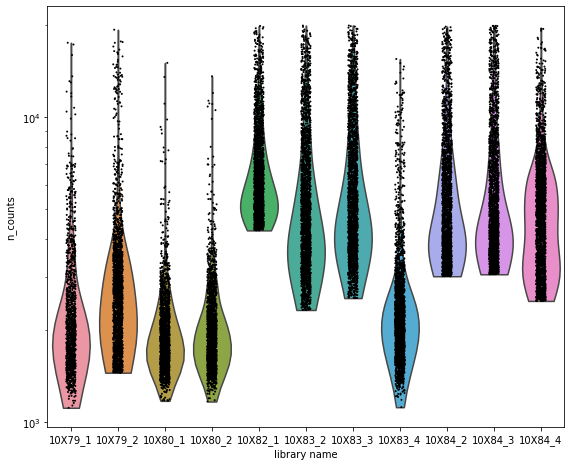

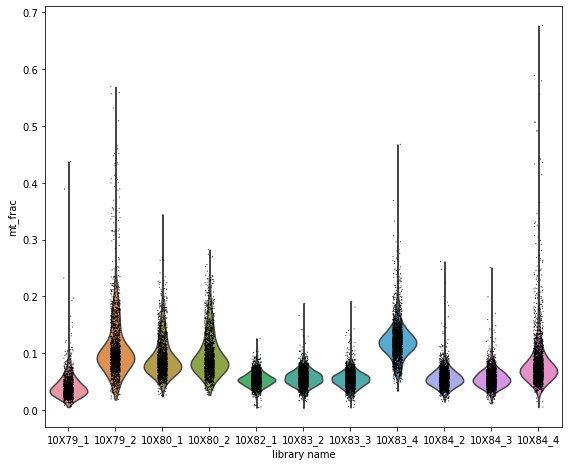

In [66]:
# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(adata, 'n_counts', groupby='library_name', size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'mt_frac', groupby='library_name')

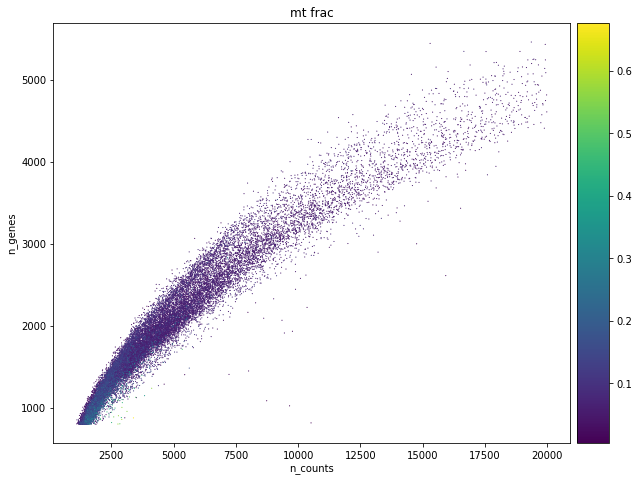

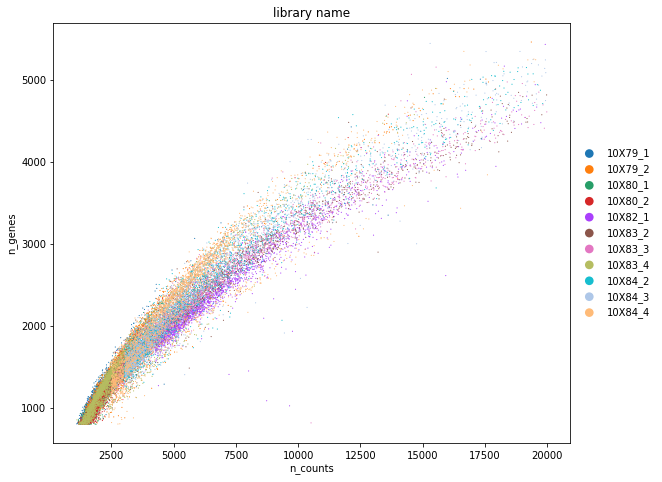

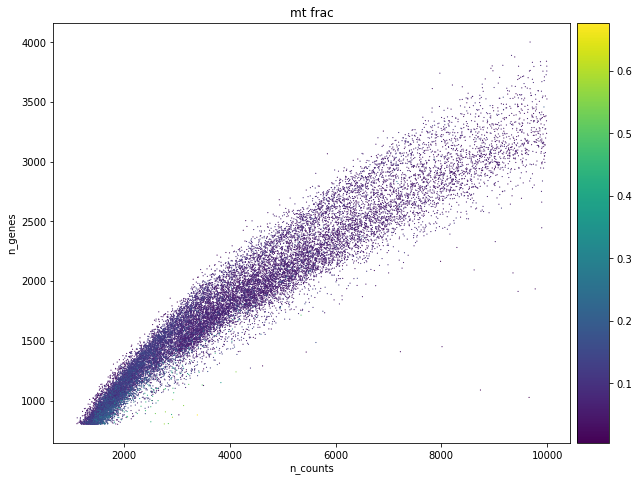

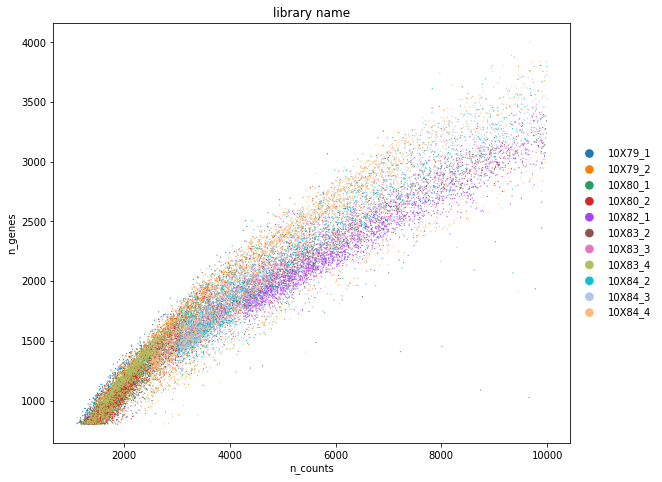

In [67]:
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='mt_frac')
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='library_name')
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='mt_frac')
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='library_name')

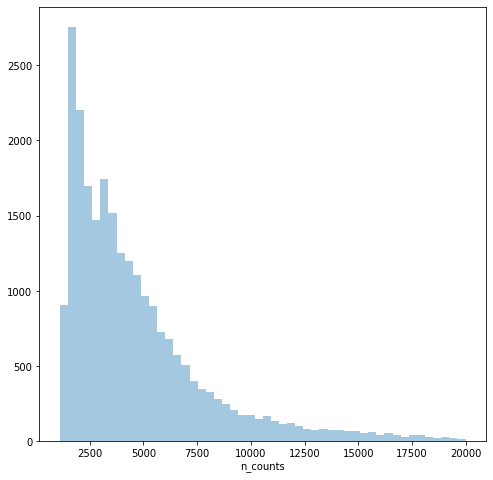

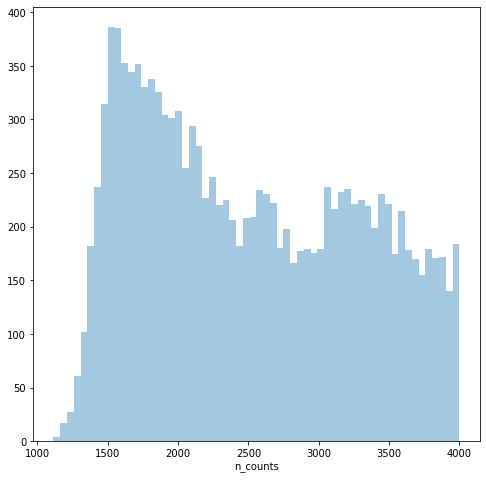

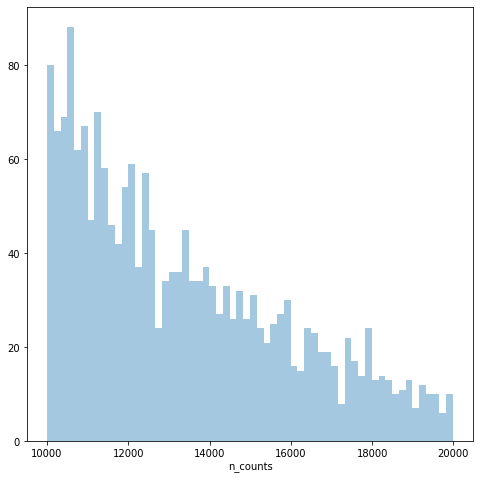

In [69]:
#Thresholding decision: counts
p3 = sns.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sns.distplot(adata.obs['n_counts'][adata.obs['n_counts']<4000], kde=False, bins=60)
plt.show()

p5 = sns.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

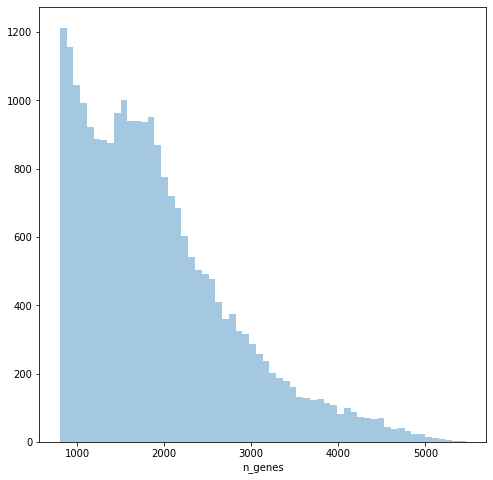

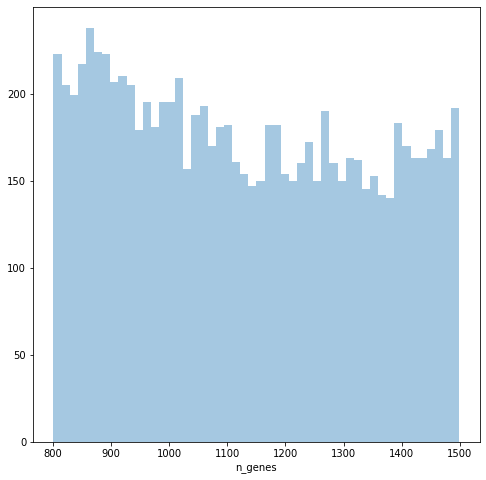

In [70]:
#Thresholding decision: genes
p6 = sns.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sns.distplot(adata.obs['n_genes'][adata.obs['n_genes']<1500], kde=False, bins=50)
plt.show()

In [71]:
# # Filter cells according to identified QC thresholds:
# print('Total number of cells: {:d}'.format(adata.n_obs))

# sc.pp.filter_cells(adata, min_counts = 500)
# print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

# sc.pp.filter_cells(adata, max_counts = 45000)
# print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.2]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

# sc.pp.filter_cells(adata, min_genes = 400)
# print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Number of cells after MT filter: 23831


In [72]:
genes_positivecells = (adata.X.toarray() > 0).T.sum(axis=1)

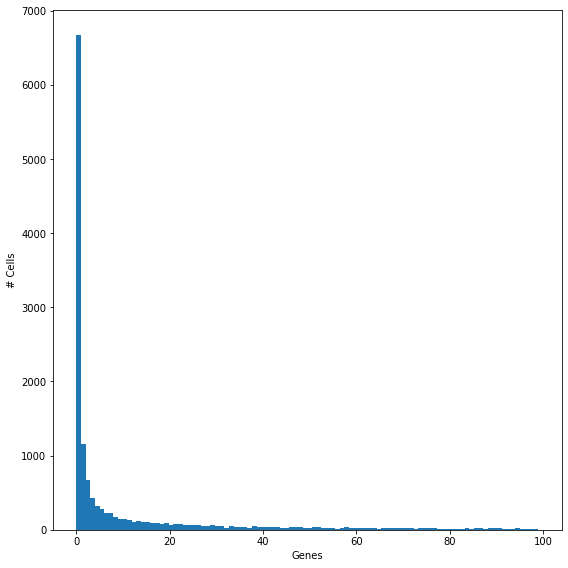

In [73]:
num_bins = 100

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(genes_positivecells[genes_positivecells<100], num_bins, density=0)

ax.set_xlabel('Genes')
ax.set_ylabel('# Cells')

fig.tight_layout()
plt.show()

In [74]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 10 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=10)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 27933
filtered out 10322 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, making a copy.


Number of genes after cell filter: 17611


In [76]:
# 23831 cells and 17611 genes passed filtering
assert adata.X.shape == (23831, 17611)

In [78]:
adata

AnnData object with n_obs × n_vars = 23831 × 17611 
    obs: 'source name', 'organism', 'characteristics: strain', 'characteristics: age', 'characteristics: sex of pooled animals', 'characteristics: cell cluster', 'molecule', 'SRR run accession', 'raw file (original file name)', 'UMI_CellularBarcode', 'library_name', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac'
    var: 'n_cells'
    uns: 'library_name_colors'

In [77]:
adata.write(neural_data_dir + 'Hochgerner_postFiltering.h5ad')

### 2.3 Log transform read count matrix, and save it in adata.raw
#### Also, save the read count matrix in adata.layers beforehand

In [79]:
adata = sc.read(neural_data_dir + 'Hochgerner_postFiltering.h5ad')

In [80]:
adata

AnnData object with n_obs × n_vars = 23831 × 17611 
    obs: 'source name', 'organism', 'characteristics: strain', 'characteristics: age', 'characteristics: sex of pooled animals', 'characteristics: cell cluster', 'molecule', 'SRR run accession', 'raw file (original file name)', 'UMI_CellularBarcode', 'library_name', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac'
    var: 'n_cells'
    uns: 'library_name_colors'

In [81]:
#Keep the count data in a counts layer
adata.layers['counts'] = adata.X.copy()

In [82]:
# Natural log-transform the data
sc.pp.log1p(adata)

In [83]:
# Store the full data set in 'raw' as log-normalised data for statistical testing
adata.raw = adata

In [84]:
adata.write(neural_data_dir + 'Hochgerner_postFiltering_log.h5ad')

# 3 Batch correction with Harmony

In [85]:
adata = sc.read(neural_data_dir + 'Hochgerner_postFiltering_log.h5ad')

In [86]:
adata

AnnData object with n_obs × n_vars = 23831 × 17611 
    obs: 'source name', 'organism', 'characteristics: strain', 'characteristics: age', 'characteristics: sex of pooled animals', 'characteristics: cell cluster', 'molecule', 'SRR run accession', 'raw file (original file name)', 'UMI_CellularBarcode', 'library_name', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac'
    var: 'n_cells'
    uns: 'library_name_colors'
    layers: 'counts'

### 3.1 Calculating and keep top 2500 Highly Variable Genes (HVGs) with scanpy

In [87]:
n_genes = 2500

sc.pp.recipe_zheng17(adata, n_top_genes = 2500, log=False) # log=False as adata.X is already log-transformed

running recipe zheng17
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:07)


In [88]:
# Make sure adata has the correct shape
assert adata.X.shape == (23831, 2500)

### 3.2 Performing PCA with scanpy

In [89]:
sc.tl.pca(adata, n_comps=50)

computing PCA with n_comps = 50
    finished (0:00:02)


In [90]:
adata

AnnData object with n_obs × n_vars = 23831 × 2500 
    obs: 'source name', 'organism', 'characteristics: strain', 'characteristics: age', 'characteristics: sex of pooled animals', 'characteristics: cell cluster', 'molecule', 'SRR run accession', 'raw file (original file name)', 'UMI_CellularBarcode', 'library_name', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all'
    var: 'n_cells', 'n_counts'
    uns: 'library_name_colors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

### 3.3 Running Harmony

Note: Harmony needs PCs as input. 

In [91]:
# Make sure data dimensonality is good
assert adata.X.shape == (23831, 2500)
assert adata.obsm['X_pca'].shape == (23831, 50)

In [92]:
meta_data = adata.obs # adata.obs can be used directly as metadata
vars_use = ['library_name'] # Correct between libraries
data_mat = adata.obsm['X_pca'] # Initial data is PCA output

In [93]:
ho = hm.run_harmony(data_mat, meta_data, vars_use, max_iter_kmeans=50) # Run Harmony till convergence

2021-07-28 17:44:51,223 - harmonypy - INFO - Iteration 1 of 50
2021-07-28 17:45:13,478 - harmonypy - INFO - Iteration 2 of 50
2021-07-28 17:45:35,488 - harmonypy - INFO - Iteration 3 of 50
2021-07-28 17:45:51,720 - harmonypy - INFO - Iteration 4 of 50
2021-07-28 17:46:13,366 - harmonypy - INFO - Iteration 5 of 50
2021-07-28 17:46:34,268 - harmonypy - INFO - Iteration 6 of 50
2021-07-28 17:46:54,657 - harmonypy - INFO - Converged after 6 iterations


In [94]:
# ho.Z_corr holds the corrected matrix, but transposed
assert ho.Z_corr.shape == (50, 23831)

In [95]:
adata.obsm['Harmony'] = ho.Z_corr.T

In [96]:
adata

AnnData object with n_obs × n_vars = 23831 × 2500 
    obs: 'source name', 'organism', 'characteristics: strain', 'characteristics: age', 'characteristics: sex of pooled animals', 'characteristics: cell cluster', 'molecule', 'SRR run accession', 'raw file (original file name)', 'UMI_CellularBarcode', 'library_name', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all'
    var: 'n_cells', 'n_counts'
    uns: 'library_name_colors', 'pca'
    obsm: 'X_pca', 'Harmony'
    varm: 'PCs'
    layers: 'counts'

In [97]:
adata.obsm['Harmony']

array([[ 13.27421   ,  -2.869416  ,  -7.2258563 , ...,  -0.1553306 ,
         -1.1122047 ,   1.097697  ],
       [ 10.728454  ,   0.33941734,  -4.723238  , ...,   0.7994776 ,
         -0.60775775,  -3.4042985 ],
       [  9.854614  ,   0.61628646,  -3.3521833 , ...,   0.4338477 ,
          0.13214953,  -0.5177619 ],
       ...,
       [-10.467285  ,  -5.5956225 ,   0.7753498 , ...,   1.134677  ,
         -0.7376845 ,   1.3124843 ],
       [-10.871775  ,  -4.8389125 ,   0.8741962 , ...,   1.1513292 ,
         -0.48060682,   1.5002323 ],
       [-10.649111  ,  -3.469779  ,   0.3667571 , ...,  -0.43765157,
         -0.24376082,  -0.45618117]], dtype=float32)

In [100]:
adata.write(neural_data_dir + 'Hochgerner_postFiltering_log_pcs50_Harmony.h5ad')

# 4 Clustering and cell typing

In [101]:
adata = sc.read(neural_data_dir + 'Hochgerner_postFiltering_log_pcs50_Harmony.h5ad')

### 4.1 Louvain clustering and single-cell embedding with PAGA

computing neighbors


/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostic

    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:10)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 16 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:02)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)
--> added 'pos', the PAGA positions (adata.uns['paga'])


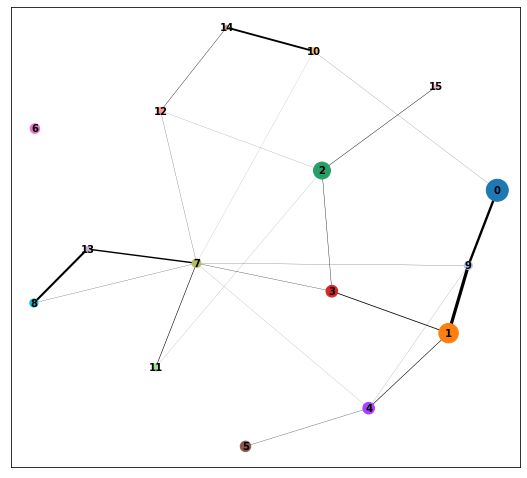

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:29)


In [102]:
sc.pp.neighbors(
    adata,
    use_rep='Harmony',  
#    random_state=random_seed 
)

sc.tl.louvain(
    adata,
    resolution=0.50,
#    random_state=random_seed
)

sc.tl.paga(
    adata,
    groups='louvain', 
)

sc.pl.paga(
    adata, 
    color=['louvain'], 
    use_raw=True,
    layout='fr',
    threshold=0.01,
    node_size_scale=0.5,
    node_size_power=0.9, 
#    random_state=random_seed,
)

sc.tl.umap(
    adata,
    init_pos='paga',
#    random_state=random_seed,
)

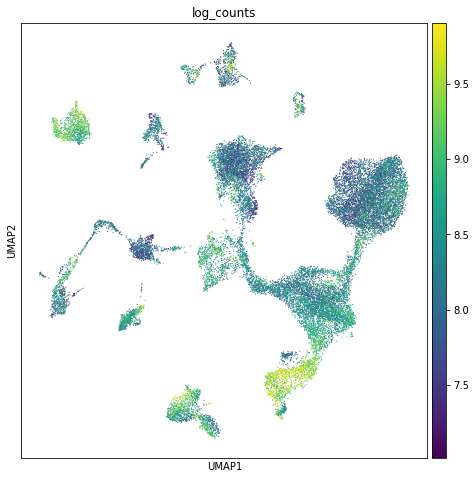

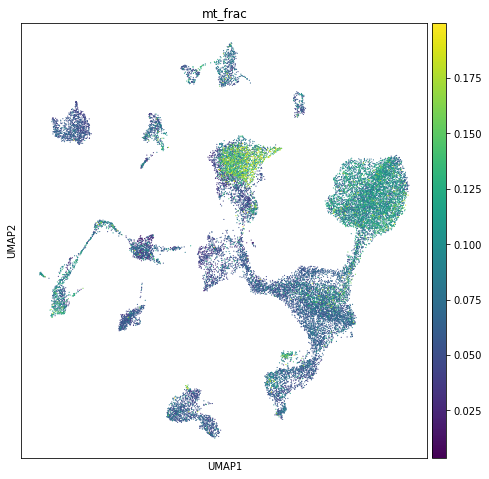

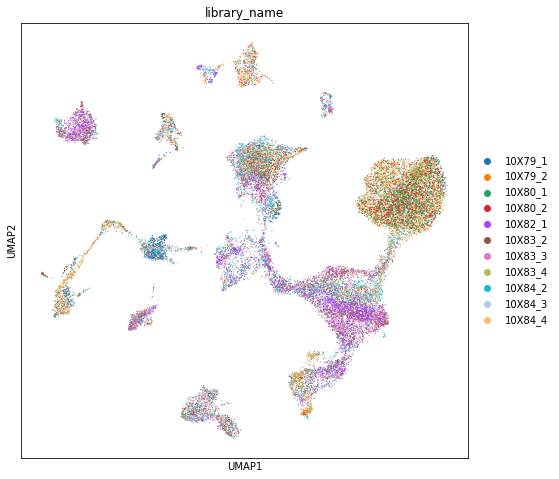

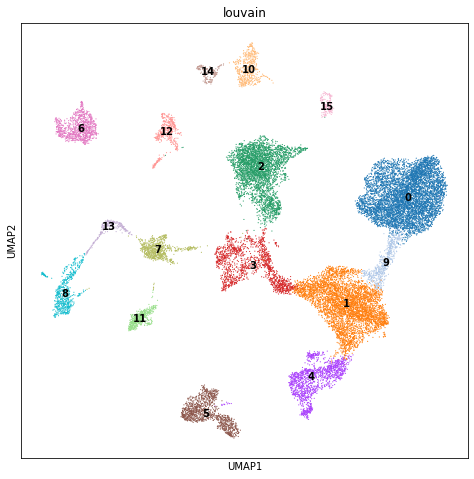

In [103]:
# Visualize sequencing depth, library distribution, and Louvain clusters
sc.pl.umap(adata, color='log_counts')
sc.pl.umap(adata, color='mt_frac')
sc.pl.umap(adata, color='library_name')
sc.pl.umap(adata, color='louvain', legend_loc='on data', )

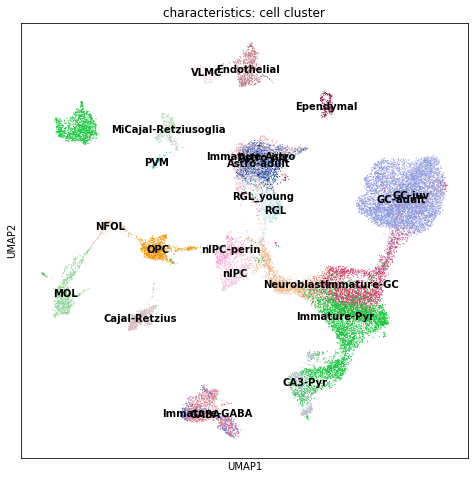

In [106]:
sc.pl.umap(adata, color='characteristics: cell cluster', legend_loc='on data')

In [107]:
adata.write(neural_data_dir + 'Hochgerner_postFiltering_log_pcs50_Harmony_PAGA_louvain.h5ad')

# 5 Pseudotime analysis

In [30]:
adata = sc.read(neural_data_dir + 'Hochgerner_postFiltering_log_pcs50_Harmony_PAGA_louvain.h5ad')

In [31]:
adata.obs['characteristics: cell cluster'].cat.categories

Index(['Astro-adult', 'Astro-juv', 'CA3-Pyr', 'Cajal-Retzius', 'Endothelial',
       'Ependymal', 'GABA', 'GC-adult', 'GC-juv', 'Immature-Astro',
       'Immature-GABA', 'Immature-GC', 'Immature-Pyr', 'MOL',
       'MiCajal-Retziusoglia', 'NFOL', 'Neuroblast', 'OPC', 'PVM', 'RGL',
       'RGL_young', 'VLMC', 'nIPC', 'nIPC-perin'],
      dtype='object')

In [32]:
adata.obs['characteristics: age'].cat.categories

Index(['E16.5', 'P0', 'P5', 'P18', 'P19', 'P23', 'P120', 'P132'], dtype='object')

### 5.1 Keep clusters on the main neurogenesis trajectory, according to Hochgerner et al. (Fig. 5)

i.e. Keep clusters 'Astro-adult', 'Astro-juv', 'RGL', 'RGL_young', 'nIPC', 'nIPC-perin', 'Neuroblast'

#### 5.1.1 Create a filter

In [10]:
clusters_include = ['Astro-adult', 'Astro-juv', 'RGL', 'RGL_young', 'nIPC', 'nIPC-perin', 'Neuroblast']

In [11]:
index_include = []
for index in adata.obs.index:
    if adata.obs['characteristics: cell cluster'][index] in clusters_include: 
        index_include.append(index)

In [12]:
len(index_include)

4945

In [46]:
count_series = adata.obs.groupby(['characteristics: cell cluster', 'characteristics: age']).size()

In [48]:
for cluster in clusters_include:
    print(cluster)
    print(count_series[cluster])
    print('\n')

Astro-adult
characteristics: age
P18      15
P19     132
P23      10
P120    324
P132    677
dtype: int64


Astro-juv
characteristics: age
P18     153
P19     133
P23     343
P120      9
P132     71
dtype: int64


RGL
characteristics: age
P18       3
P19      21
P23      30
P120    115
P132     22
dtype: int64


RGL_young
characteristics: age
E16.5    107
P0       325
P5       241
P18        5
P23        7
P132       1
dtype: int64


nIPC
characteristics: age
E16.5     51
P0        60
P5       120
P18       25
P19       28
P23       12
P120      40
P132      17
dtype: int64


nIPC-perin
characteristics: age
E16.5    159
P0       136
P5       156
P18        4
P19        1
P23        7
P120       5
dtype: int64


Neuroblast
characteristics: age
E16.5    206
P0       456
P5       426
P18       24
P19       66
P23       47
P120     130
P132      25
dtype: int64




In [122]:
# assert len(index_include) == 11654

#### 5.1.2 Subset full dataset

In [49]:
# Read Harmonized, but unclustered single-cell data
adata_tmp = sc.read(neural_data_dir + 'Hochgerner_postFiltering_log_pcs50_Harmony.h5ad')

In [50]:
adata_neural = adata_tmp[index_include,:]

In [51]:
adata_neural.var_names_make_unique()

In [53]:
# Only keep adult and juvenile cells
adata_neural = adata_neural[adata_neural.obs['characteristics: age'].isin(['P18', 'P19', 'P23', 'P120', 'P132'])]

In [54]:
adata_neural

View of AnnData object with n_obs × n_vars = 2502 × 2500 
    obs: 'source name', 'organism', 'characteristics: strain', 'characteristics: age', 'characteristics: sex of pooled animals', 'characteristics: cell cluster', 'molecule', 'SRR run accession', 'raw file (original file name)', 'UMI_CellularBarcode', 'library_name', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all'
    var: 'n_cells', 'n_counts'
    uns: 'library_name_colors', 'pca'
    obsm: 'Harmony', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [55]:
del adata_tmp

In [56]:
adata_neural.write(neural_data_dir + 'MT_Hochgerner_postFiltering_log_pcs50_Harmony.h5ad')

In [57]:
adata_neural.obs['characteristics: age'].value_counts()

P132    813
P120    623
P23     456
P19     381
P18     229
Name: characteristics: age, dtype: int64

#### 5.1.3 Re-cluster cells with finer resolution 

In [58]:
adata_neural = sc.read(neural_data_dir + 'MT_Hochgerner_postFiltering_log_pcs50_Harmony.h5ad')

computing neighbors
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


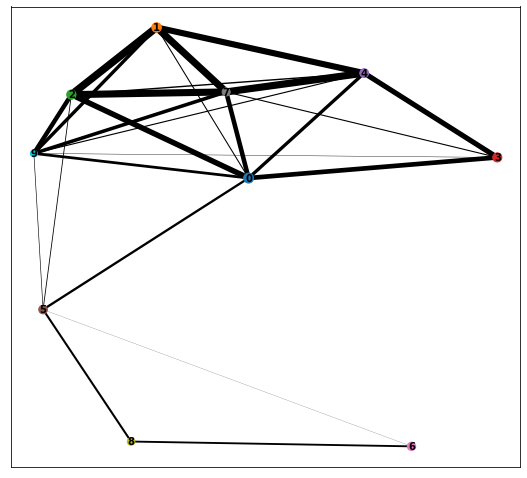

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [59]:
sc.pp.neighbors(
    adata_neural,
#    use_rep='X_pca',  
    use_rep='Harmony',  
#    random_state=random_seed
)

sc.tl.louvain(
    adata_neural,
    resolution=1.00,
#    resolution=1.50,
    #    random_state=random_seed
)

sc.tl.paga(
    adata_neural,
    groups='louvain',  
)

sc.pl.paga(
    adata_neural, 
    color=['louvain'], 
    use_raw=True,
#    use_raw=False,
#    layout='fa', 
    layout='fr', 
    threshold=0.01, 
    node_size_scale=0.5,
    node_size_power=0.9, 
#    random_state=random_seed, 
#     save='_AllNeural_PAGA_connectivity.pdf'
)

sc.tl.umap(
    adata_neural,
    init_pos='paga', 
#    random_state=random_seed,
)

#sc.pl.pca_scatter(adata, color='n_counts')
#sc.pl.pca_scatter(adata, color='library_name')
#sc.pl.tsne(adata, color='n_counts')

In [60]:
adata_neural.write(neural_data_dir + 'MT_Hochgerner_postFiltering_log_pcs50_Harmony_louvain.h5ad')

In [61]:
adata_neural = sc.read(neural_data_dir + 'MT_Hochgerner_postFiltering_log_pcs50_Harmony_louvain.h5ad')

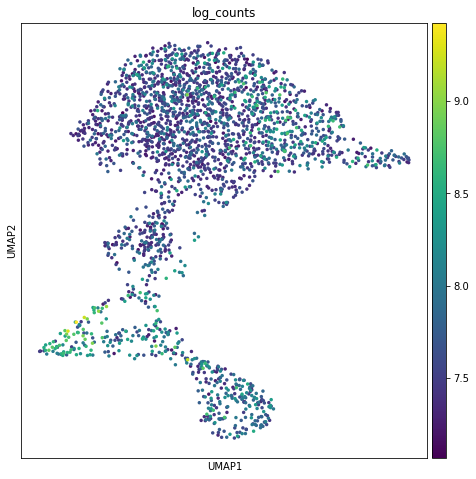

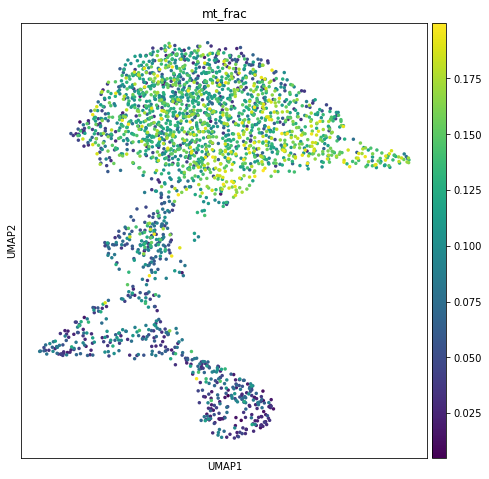

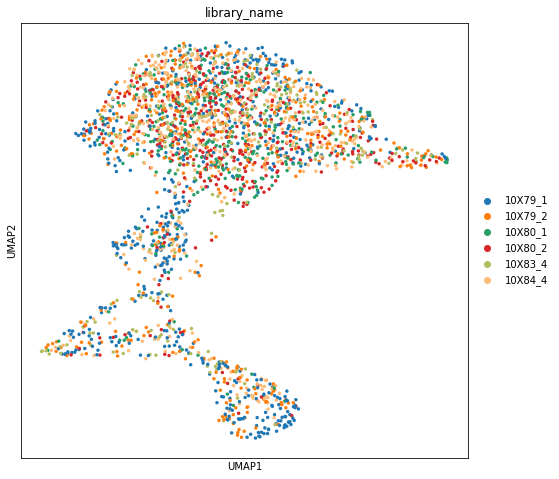

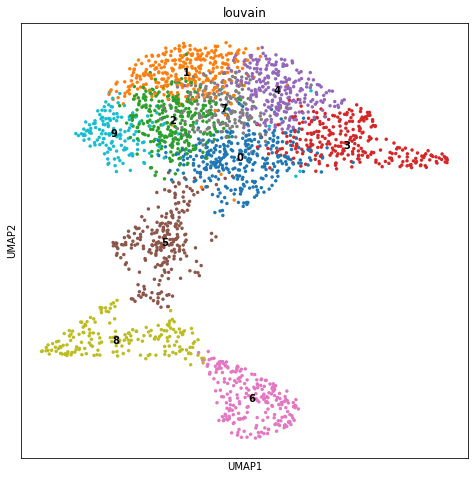

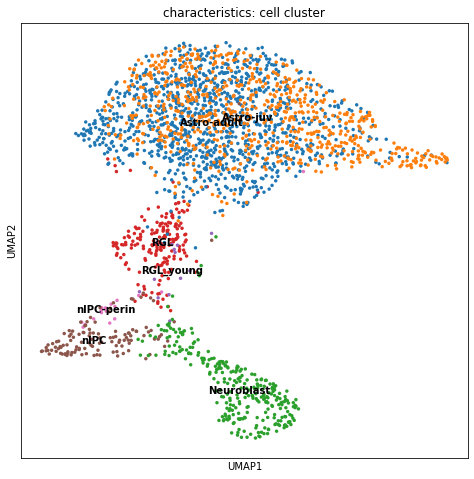

In [62]:
# Visualize sequencing depth, library distribution, and Louvain clusters
sc.pl.umap(adata_neural, color='log_counts', 
#          save='_AllNeural_log_counts.pdf'
          )
sc.pl.umap(adata_neural, color='mt_frac', 
#           save='_AllNeural_mt_frac.pdf'
          )
sc.pl.umap(adata_neural, color='library_name', 
#          save='_AllNeural_library_name.pdf'
          )
sc.pl.umap(adata_neural, color='louvain', legend_loc='on data', 
#          save='_AllNeural_louvain.pdf'
          )
sc.pl.umap(adata_neural, color='characteristics: cell cluster', legend_loc='on data', 
#          save='_AllNeural_louvain.pdf'
          )

#### 5.1.4 Annotate clusters

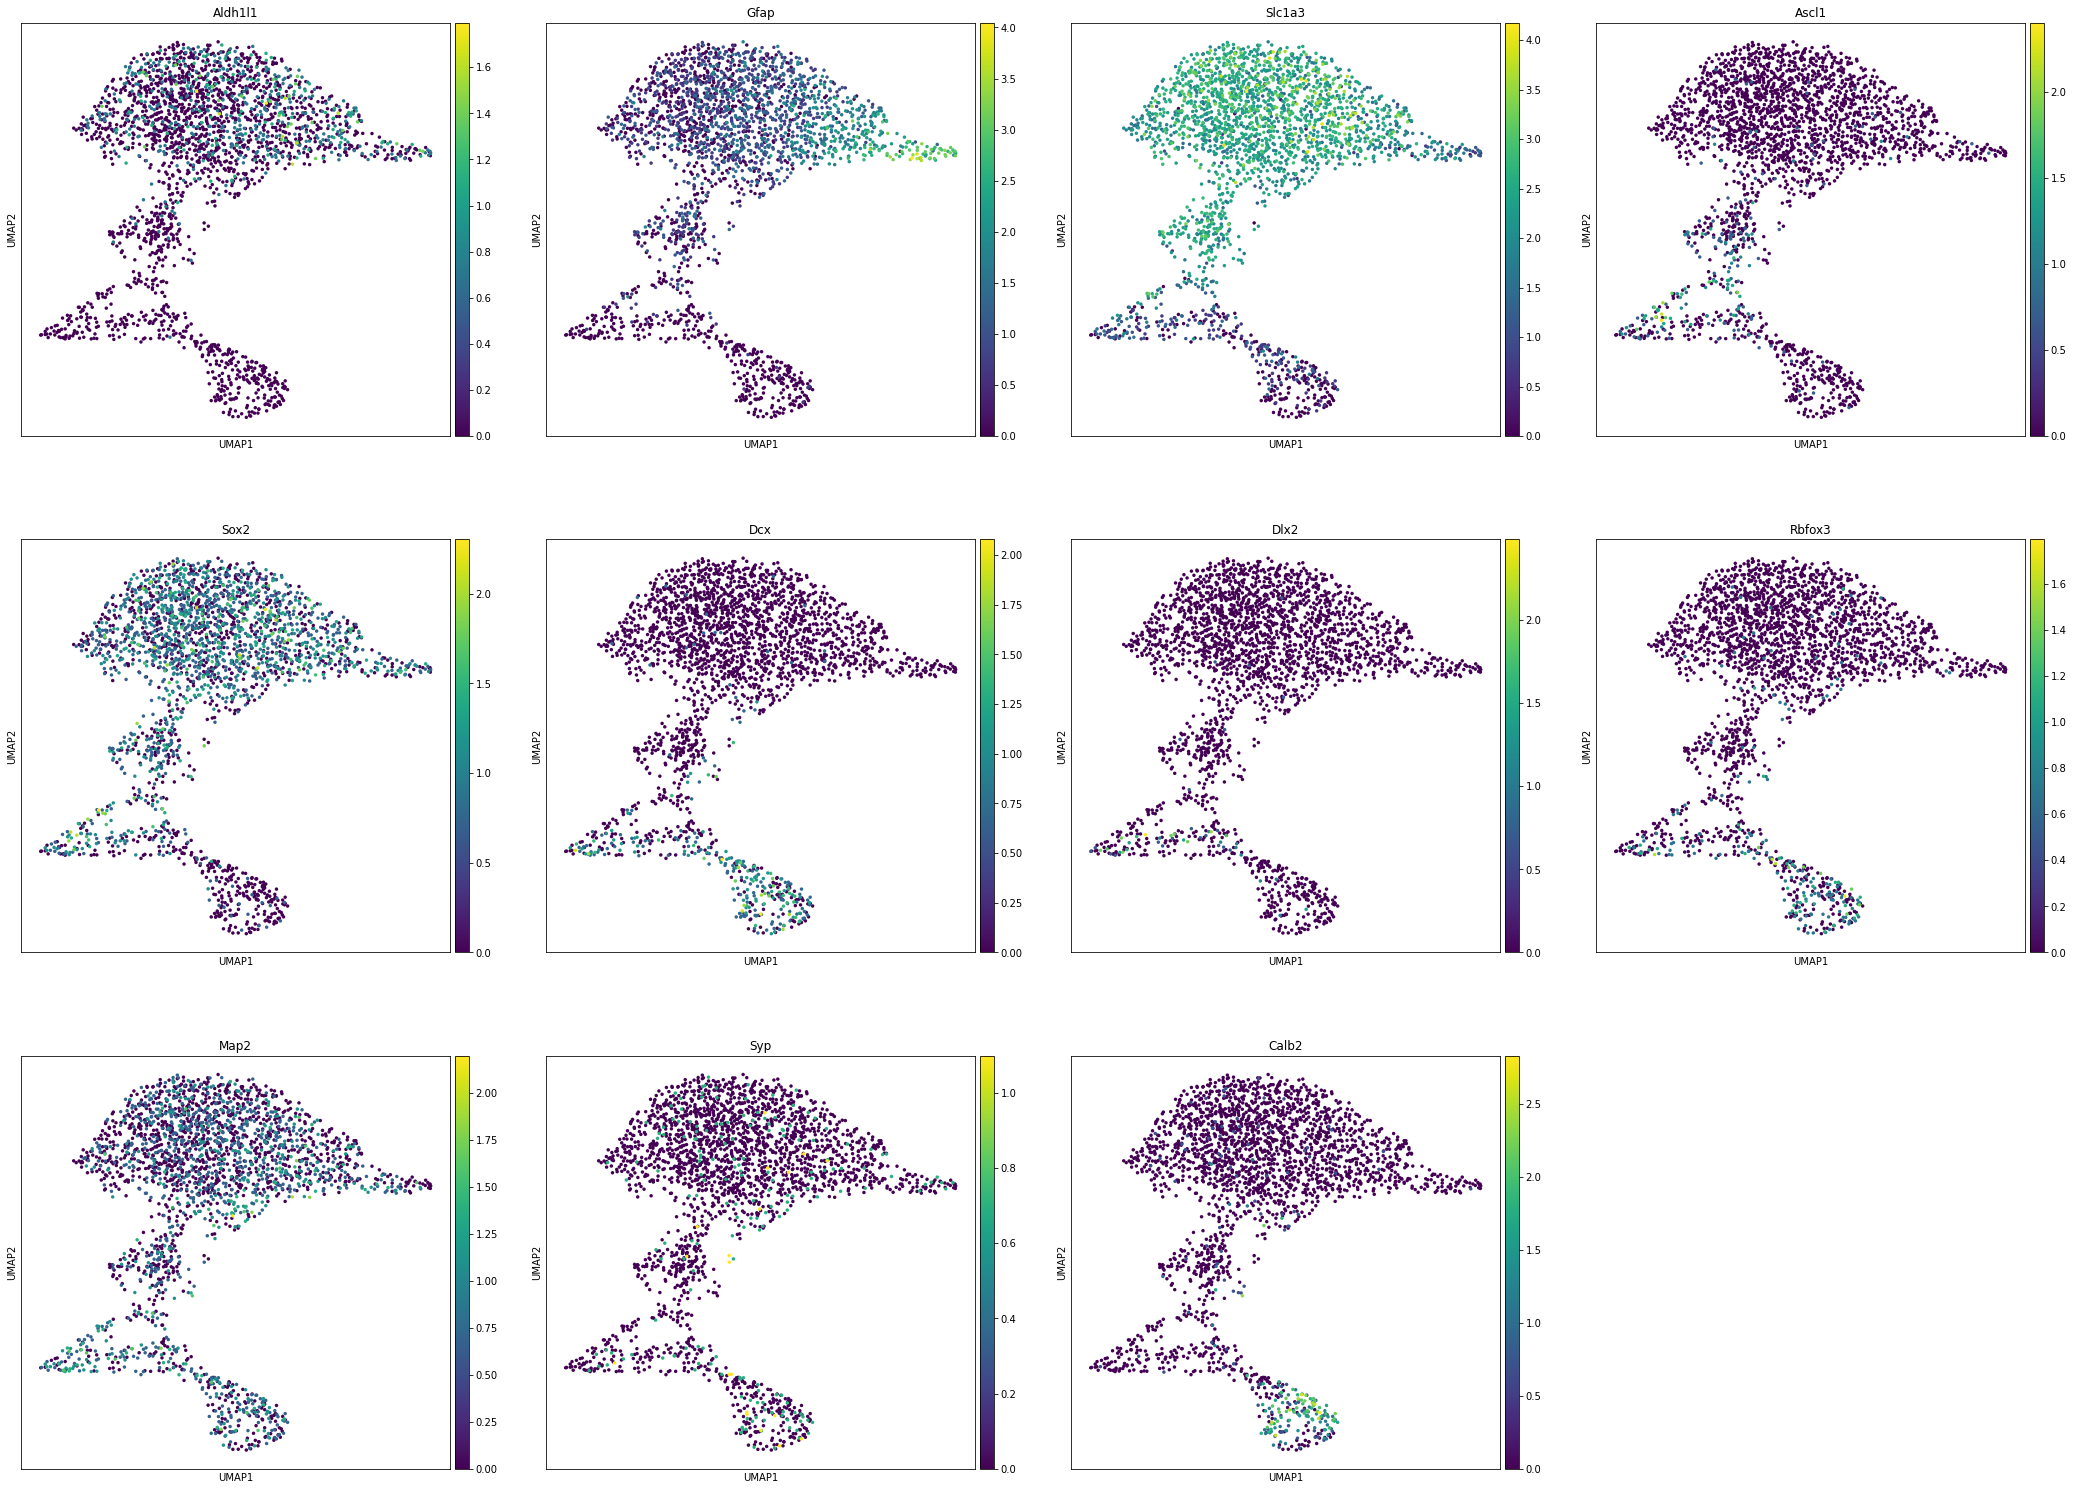

In [64]:
sc.pl.umap(adata_neural, color=['Aldh1l1', 'Gfap', 'Slc1a3', # Astrocyte markers; clusters 0, 1, 2, 3, 4, 7, 9
                         'Ascl1', 'Sox2', # Parts of clusters 5 and 8
                         'Dcx', 'Dlx2', # clusters 6 and 8
                         'Rbfox3', 'Map2', 'Syp', # Cluster 6
                         'Calb2'], # Cluster 6
           use_raw=True) 

### 5.2 Pseudotime analysis

In [81]:
adata_neural = sc.read(neural_data_dir + 'MT_Hochgerner_postFiltering_log_pcs50_Harmony_louvain.h5ad')

In [84]:
# Choose a random cell from resident astrocytes as the root of pseudotime
# adata_neural.uns['iroot'] = np.flatnonzero(adata_neural.obs['characteristics: cell cluster']=='Astro-adult')[0]
adata_neural.uns['iroot'] = np.flatnonzero(adata_neural.obs['louvain']=='4')[0]

In [85]:
sc.tl.dpt(adata_neural)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99710065 0.9897913  0.97370213 0.97075796 0.95417506
     0.9249003  0.92269295 0.90619314 0.90130633 0.8919085  0.8885738
     0.8778074  0.8729987  0.86447334]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


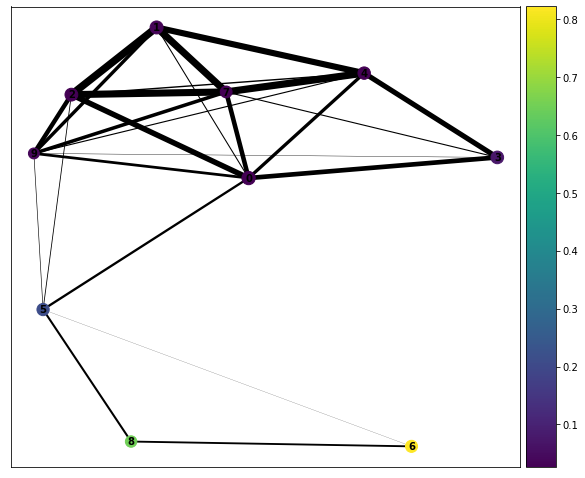

In [86]:
sc.pl.paga(adata_neural, color=['dpt_pseudotime'], use_raw=True)

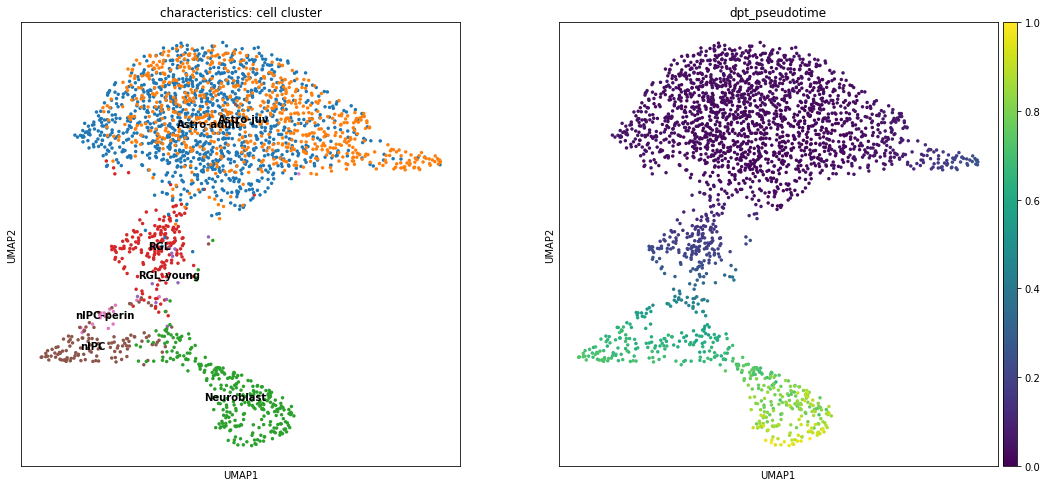

In [87]:
sc.pl.umap(adata_neural, color=['characteristics: cell cluster', 'dpt_pseudotime'], legend_loc='on data')

In [88]:
# Calculate order of Louvain clusters based on their median pseudotime
pseudotime_median = []
for cluster in adata_neural.obs['characteristics: cell cluster'].cat.categories:
    pseudotime_median.append(adata_neural.obs['dpt_pseudotime'][adata_neural.obs['characteristics: cell cluster']==cluster].median())

data = {'clusters': adata_neural.obs['characteristics: cell cluster'].cat.categories, 'pseudotime_median': pseudotime_median}

pd_pseudotime = pd.DataFrame(data=data)

pd_pseudotime.sort_values(by='pseudotime_median', inplace=True)

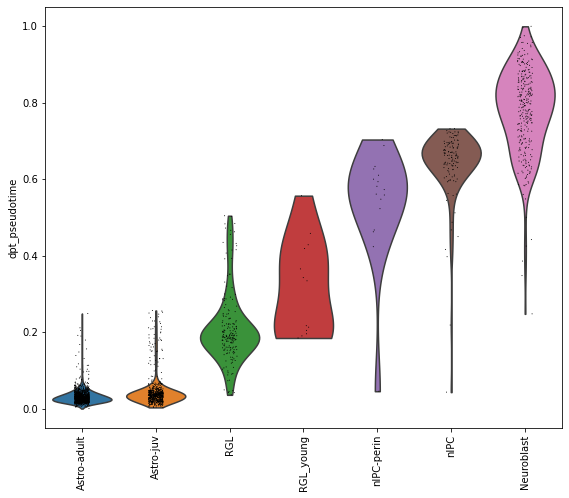

In [89]:
# Plot pseudotime in each cluster
sc.pl.violin(adata_neural, 'dpt_pseudotime', groupby='characteristics: cell cluster', use_raw=True, rotation=90, order=pd_pseudotime['clusters'])

### 5.3 Calculate pseudotime ranking

In [90]:
# Rank cells based on their pseudotime
array = np.array(adata_neural.obs['dpt_pseudotime'])

temp = array.argsort()

ranks = np.empty_like(temp)

ranks[temp] = np.arange(len(array))

In [91]:
adata_neural.obs['rank_pseudotime'] = ranks

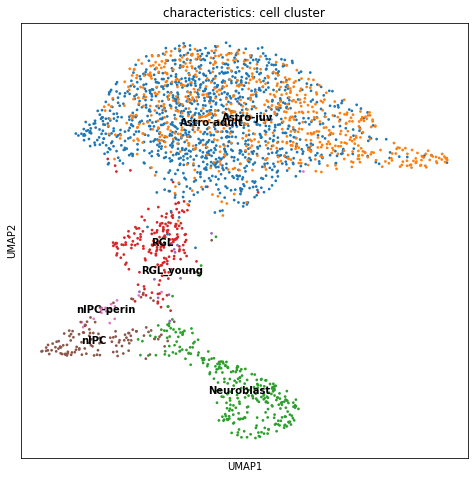

In [92]:
sc.pl.umap(adata_neural, color=['characteristics: cell cluster'], size=30, legend_loc='on data', 
#          save='_MT_louvain.pdf'
          )

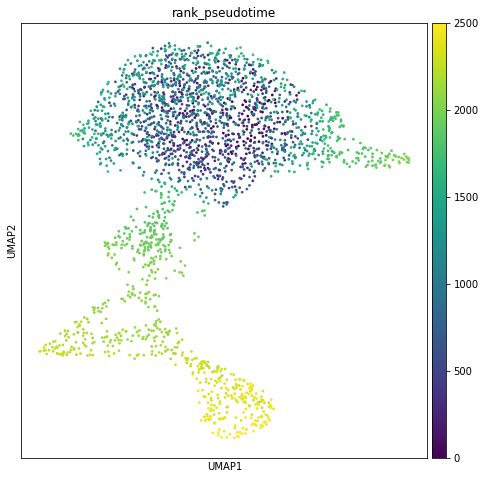

In [93]:
sc.pl.umap(adata_neural, color=['rank_pseudotime'], legend_loc='on data', size=30,
#           save='_MT_rank_pseudotime.pdf'
          )

In [94]:
adata_neural.write(neural_data_dir + 'MT_Hochgerner_postFiltering_log_pcs50_Harmony_louvain_ann_rankPseudotime.h5ad')

### 5.4 Examine known adult neurogenesis genes in dataset

In [95]:
adata_neural = sc.read(neural_data_dir + 'MT_Hochgerner_postFiltering_log_pcs50_Harmony_louvain_ann_rankPseudotime.h5ad')

#### 5.4.1 Markers from Dulken et al., 2017

In [119]:
# Rpl32 and Egfr have to be manually added to .obs. Otherwise, scanpy doesn't plot them correctly. 
for gene in ['Rpl32', 'Egfr', 'Cdk1', 'Ccna2', 'Mki67', 'Dlx1', 'Dlx2', 'Dcx', 'Dlx6os1', 'Neurod2']:

    adata_neural.obs[gene] = adata_neural.raw[:,gene].X

/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/anndata/core/anndata.py:299: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


In [113]:
genes_to_plot = ['Id3', 'Clu', 'Rpl32', 'Egfr', 'Cdk1', 'Ccna2', 'Mki67', 'Dlx1', 'Dlx2', 'Dcx', 'Dlx6os1']

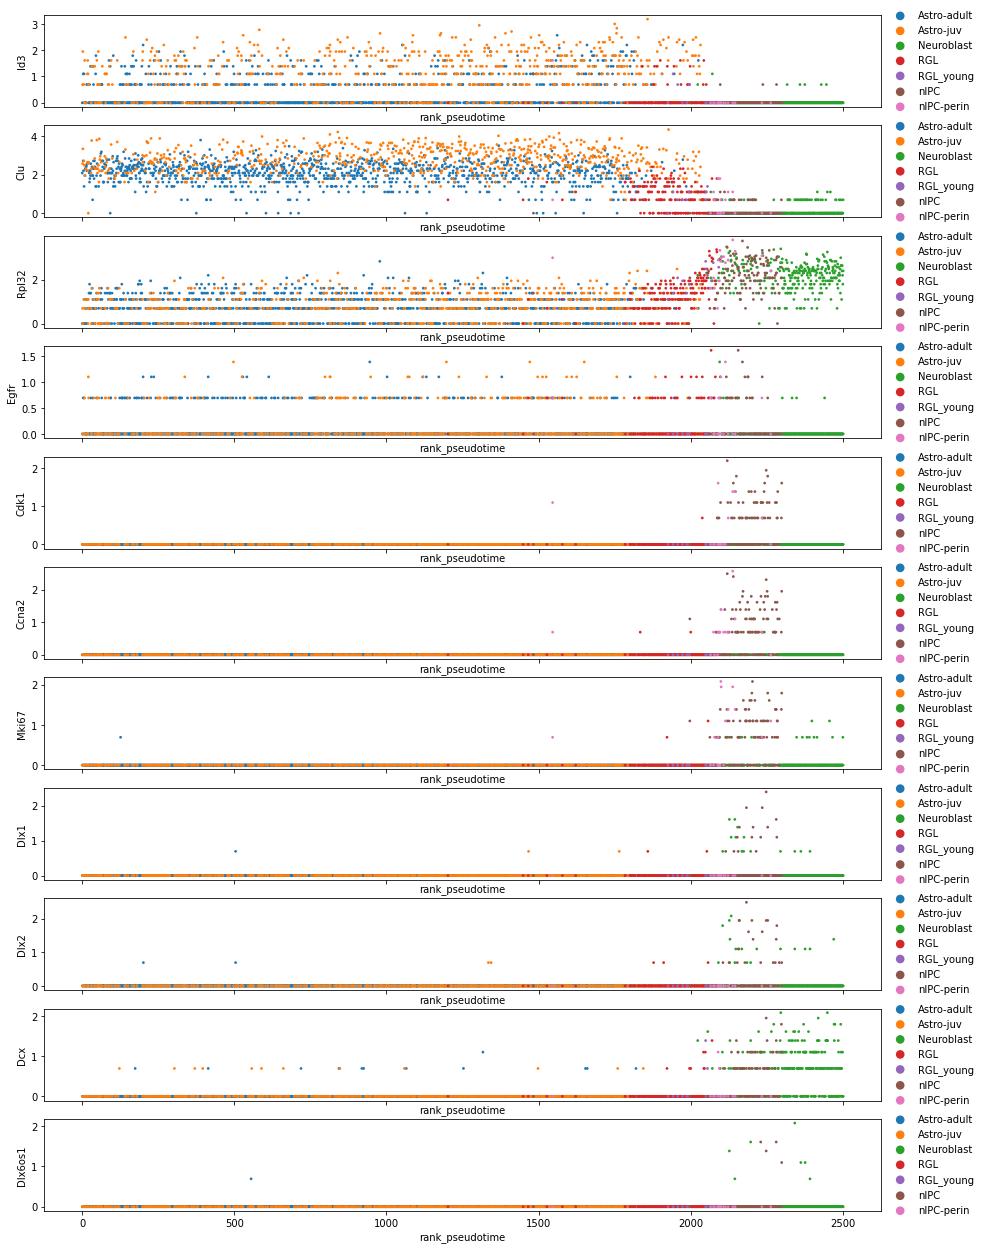

In [114]:
# Plot these genes in lenti-DLX2 cells
fig, axes = plt.subplots(nrows=len(genes_to_plot), ncols=1, figsize=(15,2*len(genes_to_plot)), sharex=True)
for i, gene in enumerate(genes_to_plot):
    sc.pl.scatter(adata_neural, x='rank_pseudotime', y=gene, color='characteristics: cell cluster', use_raw=True, size=30, ax=axes[i], show=False, 
                 title='')
# plt.savefig('./figures/scatter_Dulken_markers_pseudotime_BL41lOnly.pdf')

#### 5.4.2 Markers from Shin et al., 2015

In [115]:
genes_to_plot = ['Gfap', 'Apoe', 'Aldoc', 'Hopx',# qNSC
                 'Sox11', 'Eomes', 'Stmn1' # aNSC
                 ]

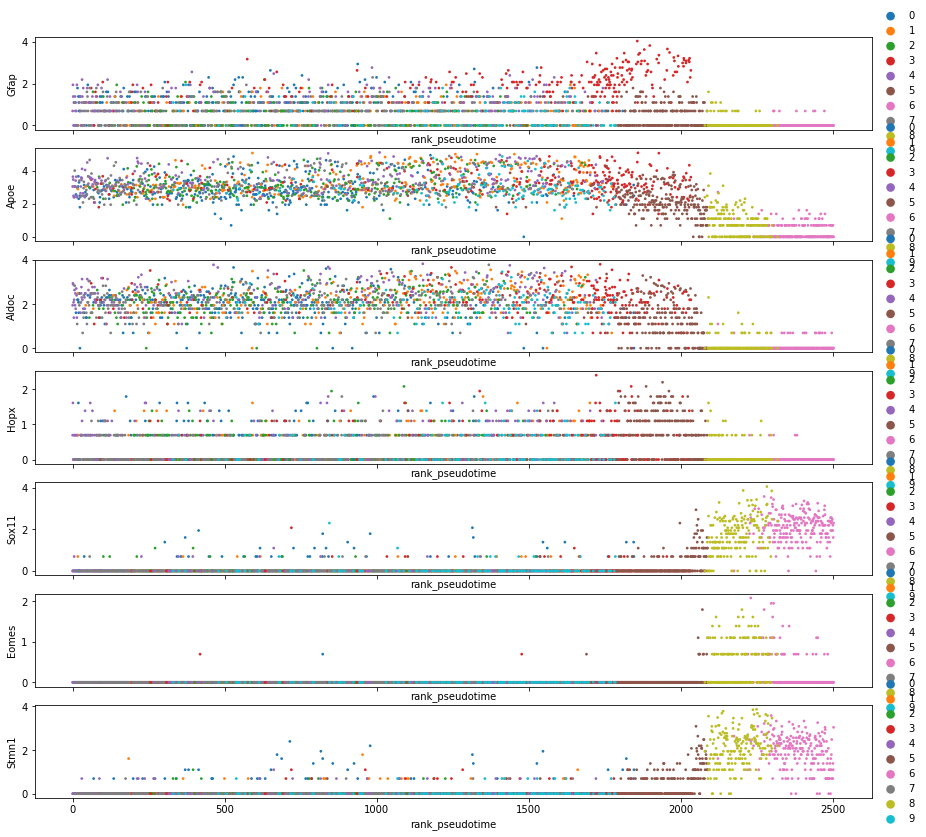

In [116]:

fig, axes = plt.subplots(nrows=len(genes_to_plot), ncols=1, figsize=(15,2*len(genes_to_plot)), sharex=True)
for i, gene in enumerate(genes_to_plot):
    sc.pl.scatter(adata_neural, x='rank_pseudotime', y=gene, color='louvain', use_raw=True, size=30, ax=axes[i], show=False, 
                 title='')
# plt.savefig('./figures/scatter_Shin_markers_pseudotime_BL41lOnly.pdf')

#### 5.4.3 Markers from Hochgerner et al., 2018

In [117]:
# From Hochgerner et al. Fig. 2d
genes_to_plot = ['Aqp4', # Astrocytes
                 'Aldoc', # Astrocytes and RGL
                 'Cdk1', 'Mki67', # nIPC
                 'Eomes', # nIPC and NB1
                 'Neurod2' # NB2
                 ]

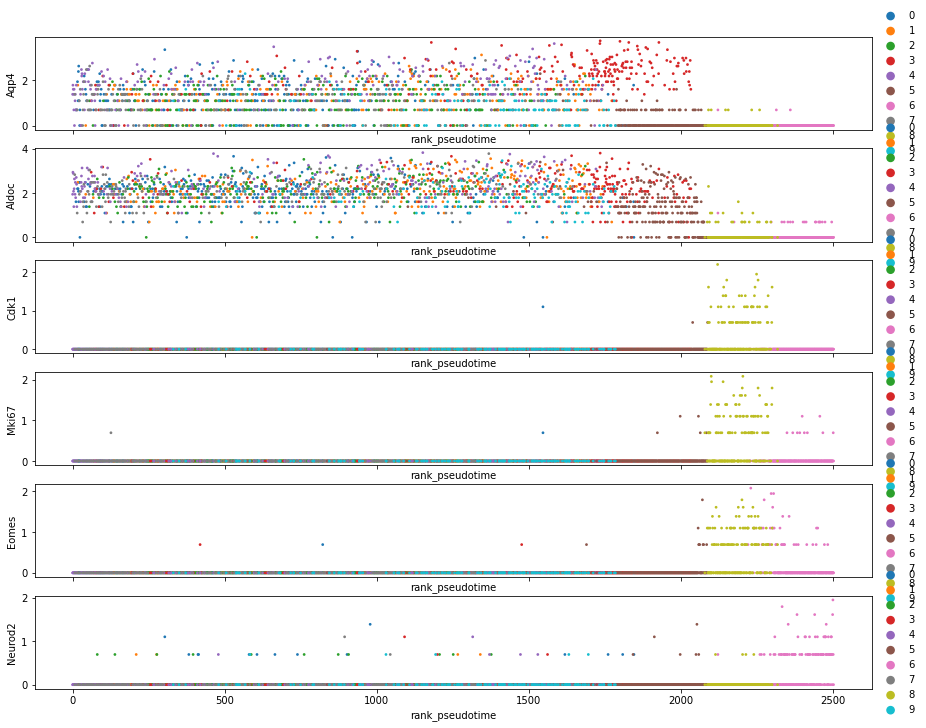

In [120]:
fig, axes = plt.subplots(nrows=len(genes_to_plot), ncols=1, figsize=(15,2*len(genes_to_plot)), sharex=True)
for i, gene in enumerate(genes_to_plot):
    sc.pl.scatter(adata_neural, x='rank_pseudotime', y=gene, color='louvain', use_raw=True, size=30, ax=axes[i], show=False, 
                 title='')
# plt.savefig('./figures/scatter_Hochgerner_fig2_markers_pseudotime_BL41lOnly.pdf')

#### 5.4.4 Other marker genes

In [121]:
genes_to_plot = ['Gfap', 'Ascl1', 'Cdk1', 'Mki67', 'Dcx', 'Calb2']

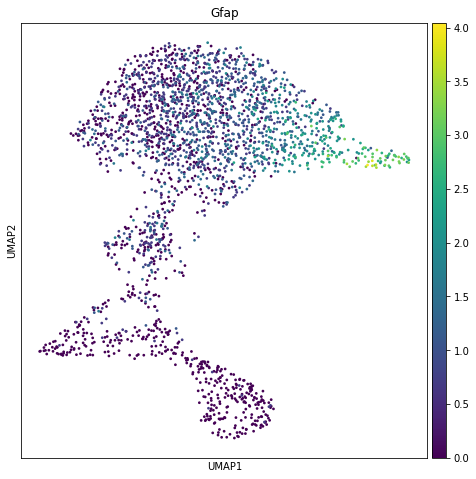

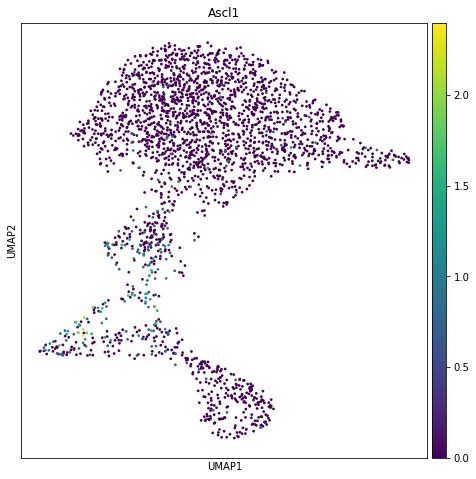

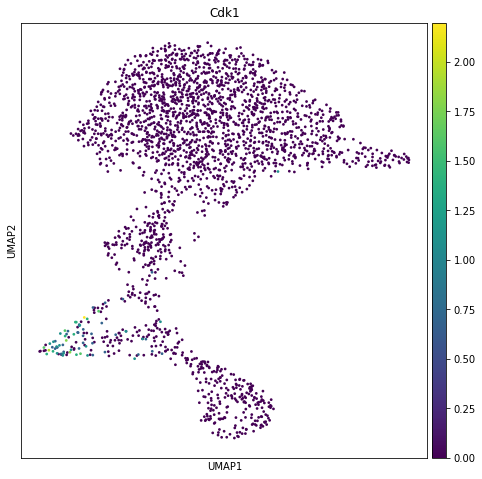

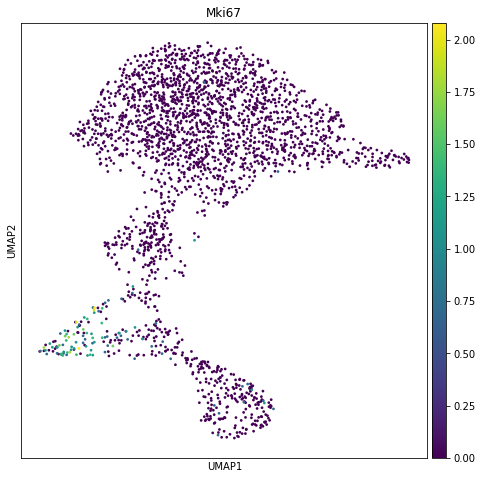

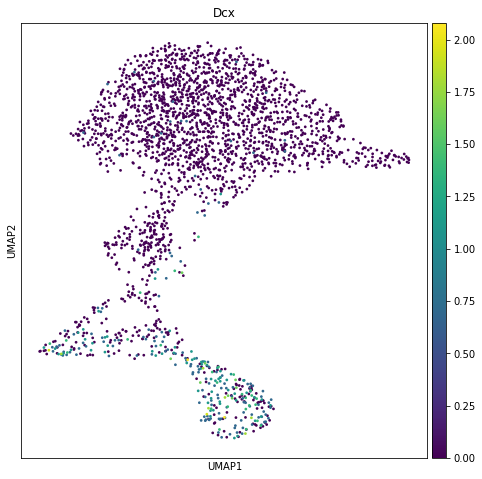

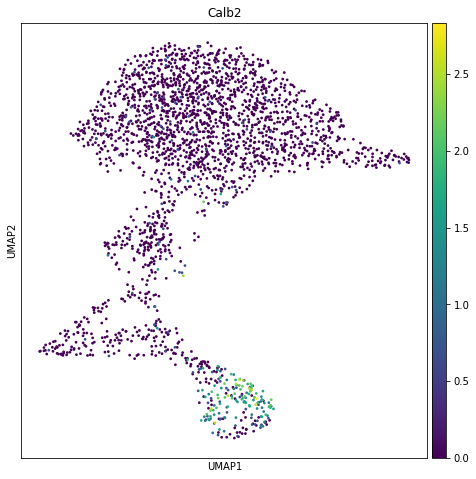

In [122]:
# Figure S3DEFGH
for gene in genes_to_plot:
    sc.pl.umap(adata_neural, color=gene, legend_loc='on data', size=30, use_raw=True, 
#              save='_MT_'+gene+'.pdf'
              )